In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Saturation pressure ##

Saturation pressure equation as a function of temperature - Eq. (30) from *Revised Release on the IAPWS Industrial Formulation 1997 for the Thermodynamic Properties of Water and Steam*. Valid from 273.15 K <= T <= 647.096 K.

In [28]:
def psat(t) :
    t_critical = 647.3
    tc2k = 273.15
    pstar4 = 1e6
    
    nr4 = [0.11670521452767e4, -0.72421316703206e6, -0.17073846940092e2, 0.12020824702470e5, -0.32325550322333e7,
           0.14915108613530e2, -0.48232657361591e4, 0.40511340542057e6, -0.238555575678490, 0.65017534844798e3]
    
    if ((t>=0.)&(t<=t_critical+tc2k)) :
        tk=t+tc2k
        theta=tk+nr4[8]/(tk-nr4[9])
        theta2=theta*theta
        a=theta2+nr4[0]*theta+nr4[1]
        b=nr4[2]*theta2+nr4[3]*theta+nr4[4]
        c=nr4[5]*theta2+nr4[6]*theta+nr4[7]
        x=2.*c/(-b+np.sqrt(b*b-4.*a*c))
        x2=x*x
        p=pstar4*x2*x2
  
    return p

Comparing the result of this calculation with the verification solutions given in Table 35 of *Revised Release on the IAPWS Industrial Formulation 1997 for the Thermodynamic Properties of Water and Steam*.


T = $300$ K, P = $0.353\,658\,941 \times 10^{-2}$ MPa

T = $500$ K, P = $0.263\,889\,776 \times 10^{1}$ MPa

T = $600$ K, P = $0.123\,443\,146 \times 10^{2}$ MPa


In [42]:
print 'T = 300K, Psat = ',psat(300-273.15)/1e6
print 'T = 500K, Psat = ',psat(500-273.15)/1e6
print 'T = 600K, Psat = ',psat(600-273.15)/1e6

T = 300K, Psat =  0.00353658941301
T = 500K, Psat =  2.63889775627
T = 600K, Psat =  12.3443145784


Read in data obtained from NIST webbook (www.nist.giv).

In [95]:
colnames = ['Temperature', 'Pressure']
nist_data = pd.read_csv('gold/water_saturation_pressure_nist.txt', delimiter ='\t', header=None, names=colnames)

Read in the MOOSE data from the FluidProperties UserObject.

In [86]:
moose_data = pd.read_csv('gold/WaterProperty_pSat_vpp_0001.csv')

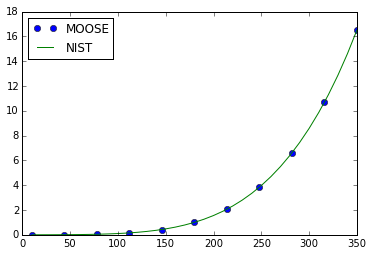

In [105]:
plt.plot(10. + 170. * moose_data.x, moose_data.WaterPropertyAuxVariable/1.e6,'o', label='MOOSE')
plt.plot(nist_data.Temperature, nist_data.Pressure, label='NIST')
plt.legend(loc='upper left')

## Saturation temperature ##

Saturation temperature equation as a function of pressure - Eq. (31) from *Revised Release on the IAPWS Industrial Formulation 1997 for the Thermodynamic Properties of Water and Steam*. Valid for 611.213 Pa <= P << 22.064 MPa.

In [48]:
def tsat(p) :
    tc2k = 273.15
    pstar = 1.e6
    
    nr4 = [0.11670521452767e4, -0.72421316703206e6, -0.17073846940092e2, 0.12020824702470e5, -0.32325550322333e7,
           0.14915108613530e2, -0.48232657361591e4, 0.40511340542057e6, -0.238555575678490, 0.65017534844798e3]
    
    if ((p>=611.23)&(p<=22.064e6)) :
        beta = np.power(p/pstar,0.25)
        beta2 = beta * beta
        ee = beta2 + nr4[2] * beta + nr4[5]
        ff = nr4[0] * beta2 + nr4[3] * beta + nr4[6]
        gg = nr4[1] * beta2 + nr4[4] * beta + nr4[7]
        
        dd = 2. * gg /(-ff - np.sqrt(ff * ff - 4. * ee * gg))
        ts = (nr4[9] + dd - np.sqrt((nr4[9]+dd)*(nr4[9]+dd) - 4. *(nr4[8] + nr4[9] * dd)))/2.
  
    return ts

Comparing the result of this calculation with the verification solutions given in Table 36 of *Revised Release on the IAPWS Industrial Formulation 1997 for the Thermodynamic Properties of Water and Steam*.


P = $0.1$ MPa, Tsat = $0.372\,755\,919 \times 10^{3}$ K

P = $1$ MPa, Tsat = $0.453\,035\,632 \times 10^{1}$ K

P = $10$ MPa, Tsat = $0.584\,149\,488 \times 10^{2}$ K


In [50]:
print 'P = 0.1 MPa, Tsat = ',tsat(0.1e6)
print 'P = 1.0 MPa, Tsat = ',tsat(1.e6)
print 'P = 10.0 MPa, Tsat = ',tsat(10.e6)

P = 0.1 MPa, Tsat =  372.755918611
P = 1.0 MPa, Tsat =  453.035632391
P = 10.0 MPa, Tsat =  584.149487999


Read in data obtained from NIST webbook (www.nist.giv).

In [106]:
colnames = ['Temperature', 'Pressure']
nist_data = pd.read_csv('gold/water_saturation_temperature_nist.txt', delimiter ='\t', header=None, names=colnames)

Read in the MOOSE data from the FluidProperties UserObject.

In [118]:
moose_data = pd.read_csv('gold/WaterProperty_tSat_vpp_0001.csv')

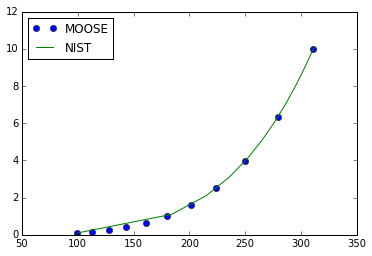

In [120]:
plt.plot(moose_data.WaterPropertyAuxVariable,(10**moose_data.x/10.), 'o', label='MOOSE')
plt.plot(nist_data.Temperature, nist_data.Pressure, label='NIST')
plt.legend(loc='upper left')